In [1]:
from cellpose import models, io
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as skio
from scipy.ndimage import distance_transform_edt
import matplotlib.colors as mcolors

model = models.Cellpose(gpu=False, model_type='cyto')

image_path = r'E:\Data_sets\ISL\tiff\r02c02_f02_ch4.tiff'
image = skio.imread(image_path)

# Grayscale
channels = [0,0] 

masks, flows, styles, diams = model.eval([image], diameter=None, channels=channels, flow_threshold=None, cellprob_threshold=0.5)

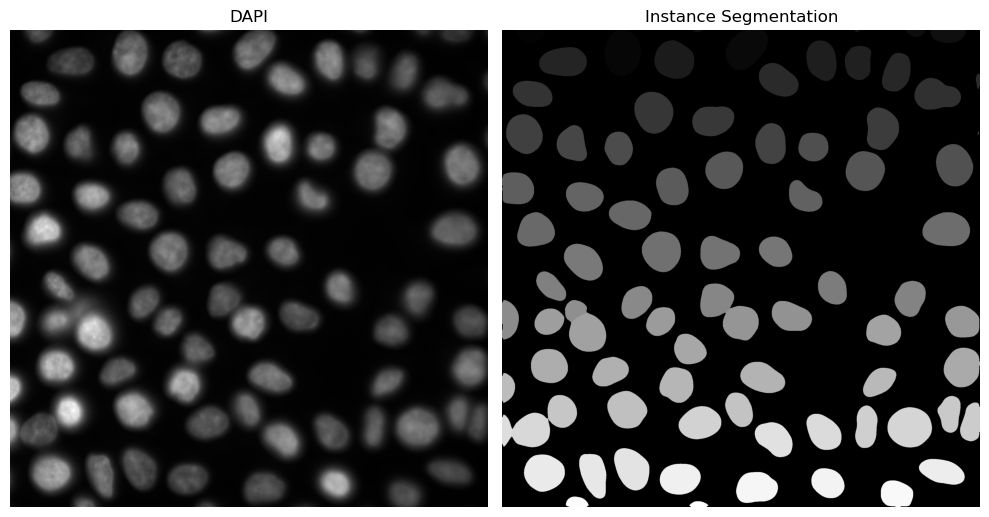

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))  

# [0,0]
ax1 = axs[0]
ax1.imshow(image[:, :, 0], cmap='gray')
ax1.set_title('DAPI')
ax1.axis('off')

# [0,1]
ax2 = axs[1]
ax2.imshow(masks[0], cmap='gray')
ax2.set_title('Instance Segmentation')
ax2.axis('off')



plt.tight_layout()

#plt.savefig(r'C:\Users\Marcel\OneDrive\Thesis\ISL\all_cell_plots_dapi.png')
plt.show()

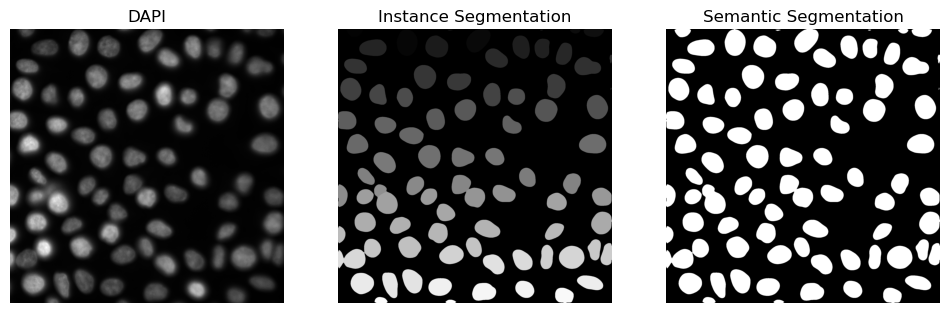

In [30]:
# Plot for thesis

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].imshow(image[:, :, 0], cmap='gray')
axs[0].set_title('DAPI')  
axs[0].axis('off')  

axs[1].imshow(masks[0], cmap='gray')
axs[1].set_title('Instance Segmentation')  
axs[1].axis('off') 

mask = masks[0] < 1
axs[2].imshow(mask, cmap='binary')
axs[2].set_title('Semantic Segmentation')  
axs[2].axis('off')  


plt.savefig(r'C:\Users\Marcel\OneDrive\Thesis\ISL\dapi_all.png')

plt.show()